# Práctico 5
1. Entrena y ajusta un árbol de decisión para el conjunto de datos moons siguiendo estos pasos:
  - Usa make_moons(n_samples=10000, noise=0.4) para generar el conjunto de datos moons.
  - Usa train_test_split() para dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
  - Usa la búsqueda en cuadrícula con validación cruzada (con la ayuda de la clase GridSearchCV) para encontrar buenos valores de hiperparámetros para un DecisionTreeClassifier. Consejo: prueba varios valores para max_leaf_nodes.
  - Entrena el modelo en el conjunto de entrenamiento completo utilizando estos hiperparámetros y mide su rendimiento en el conjunto de prueba. Deberías obtener una precisión aproximada del 85% al 87%.


In [50]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 10000, noise = 0.4)



In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

params = {'max_leaf_nodes': [2, 4, 8, 10, 20, 30, 40, 80, 100]}

grid_search = GridSearchCV(model, params, cv=5)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 4, 8, 10, 20, 30, 40, 80, 100]})

In [53]:
grid_search.best_params_

{'max_leaf_nodes': 20}

In [54]:
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_leaf_nodes=4)
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.8515

2. Cargar el dataset de iris. Tomando solamente las variables de largo y ancho del pétalo, entrenar los distintos modelos de Clasificación que se vieron en clase y comparar los bordes generadas para cada una de las Clases.
Modelos:
  - Regresión Softmax
  - Clasificador Estocástico (utilice 10000 iteraciones)
  - SVM lineal
  - SVM con kernel (pruebe diferentes kernels)
  - Naive Bayes
  - Decision Tree (utilice una profundidad máxima de 2)
  - KNeighbors (varie el número de vecinos a 3)
  


In [55]:
# Graficador

### funcion para graficar 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def generate_iris_plot(clasifier):
  x0, x1 = np.meshgrid(
          np.linspace(0, 8, 500).reshape(-1, 1),
          np.linspace(0, 3.5, 200).reshape(-1, 1),
      )

  X_new = np.c_[x0.ravel(), x1.ravel()]

  y_predict = clasifier.predict(X_new)

  zz = y_predict.reshape(x0.shape)

  plt.figure(figsize=(10, 4))
  plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
  plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
  plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

  
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

  plt.contourf(x0, x1, zz, cmap=custom_cmap)
  plt.xlabel("Petal length", fontsize=14)
  plt.ylabel("Petal width", fontsize=14)
  plt.legend(loc="center left", fontsize=14)
  plt.axis([0, 8, 0, 3.5])

  plt.show()

In [56]:
# Load

from sklearn import datasets

X, y = datasets.load_iris(return_X_y = True, as_frame=True)
iris = datasets.load_iris()
X = iris["data"][:,2:]

Score 0.9666666666666667


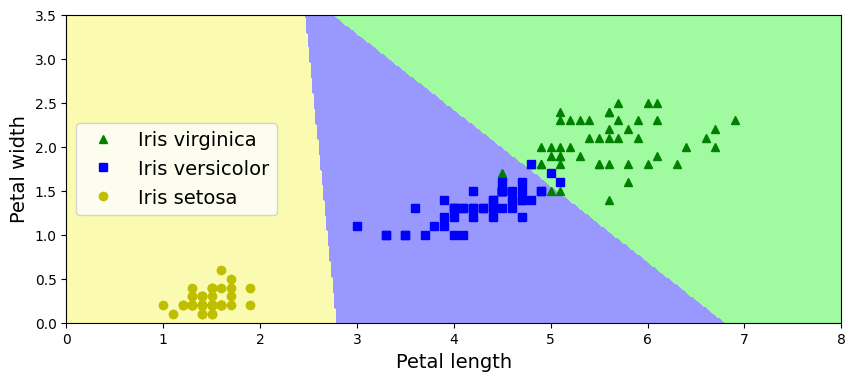

In [61]:
# Softmax
# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegression

# X, y = load_iris(return_X_y=True)

# clf_softmax = LogisticRegression(random_state=42, max_iter=10000).fit(X, y)

from sklearn.linear_model import LogisticRegression

clf_softmax = LogisticRegression(random_state=42, max_iter=10000).fit(X, y)

print("Score", clf_softmax.score(X, y))

generate_iris_plot(clf_softmax)


Score 0.8933333333333333


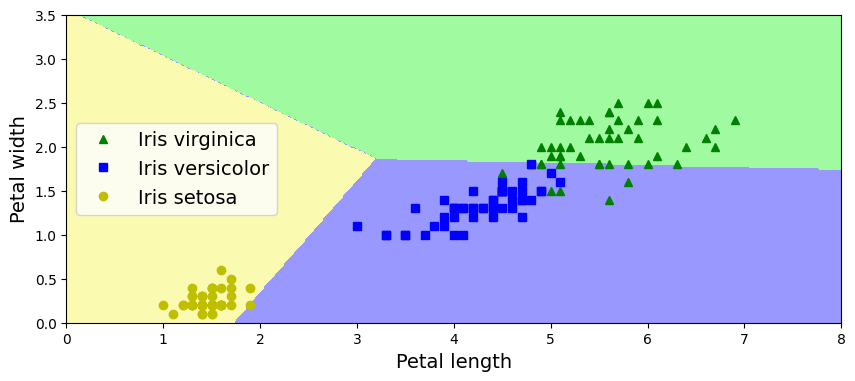

In [62]:
# Estocastico (SDG)

from sklearn.linear_model import SGDClassifier

clf_sgdc = SGDClassifier(random_state=42).fit(X, y)

print("Score", clf_sgdc.score(X, y))

generate_iris_plot(clf_sgdc)



Score 0.94


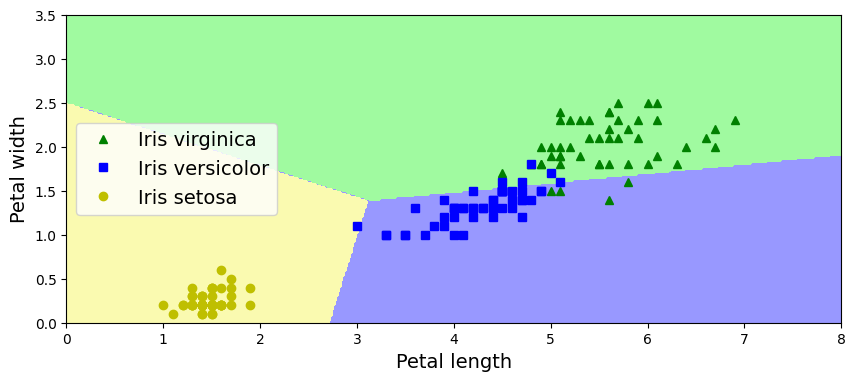

In [64]:
# SVM lineal

from sklearn.svm import LinearSVC

clf_svm = LinearSVC(random_state=42, max_iter=10000).fit(X, y)

print("Score", clf_svm.score(X, y))

generate_iris_plot(clf_svm)



Score 0.9666666666666667


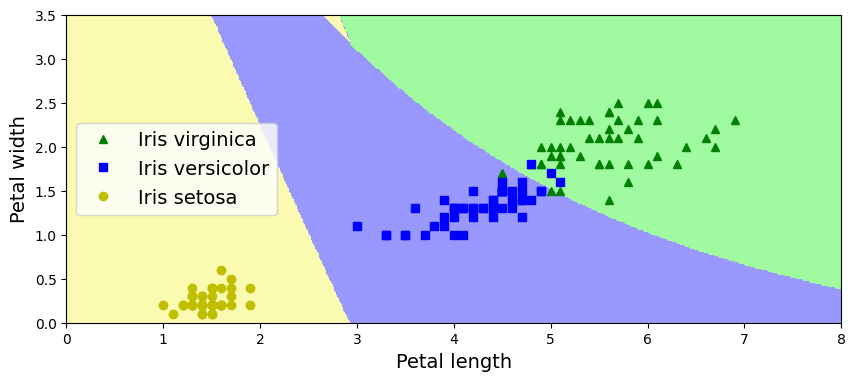

In [65]:
# SVC (poly kernel)
from sklearn.svm import SVC

clf_svcpoly = SVC(kernel="poly", max_iter = 100000)
clf_svcpoly.fit(X,y).fit(X, y)

print("Score", clf_svcpoly.score(X, y))

generate_iris_plot(clf_svcpoly)

Score 0.9533333333333334


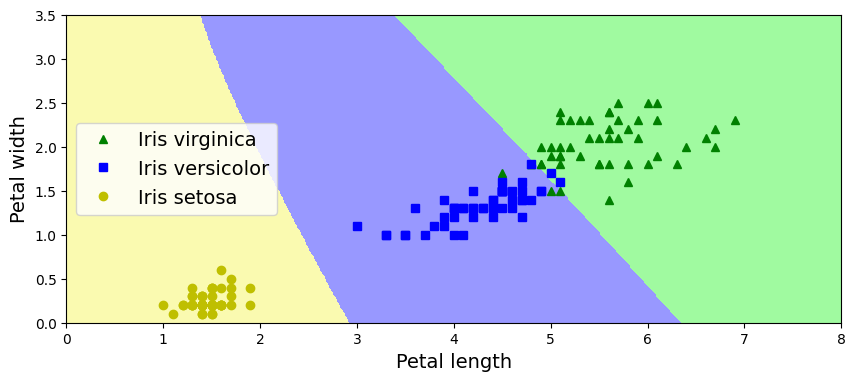

In [73]:
# SVC (rbf kernel)
from sklearn.svm import SVC

clf_svcrbf = SVC(kernel="rbf", max_iter = 100000)
clf_svcrbf.fit(X, y)

print("Score", clf_svcrbf.score(X, y))

generate_iris_plot(clf_svcrbf)

Score 0.96


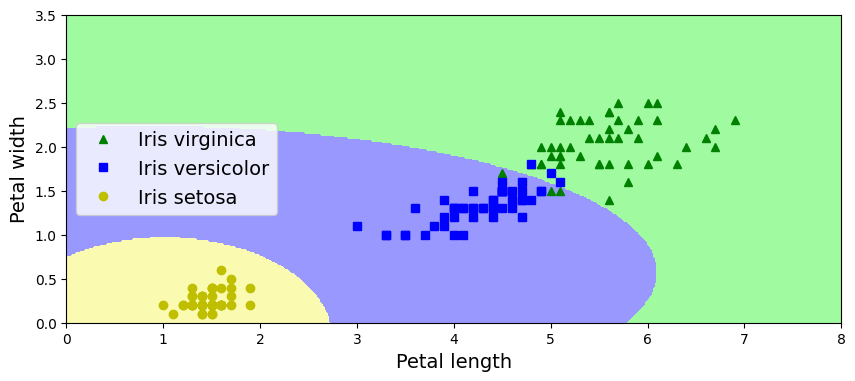

In [74]:
# NaiveBayes
from sklearn.naive_bayes import GaussianNB

clf_gauss = GaussianNB()

clf_gauss.fit(X, y)

print("Score", clf_gauss.score(X, y))

generate_iris_plot(clf_gauss)

Score 0.96


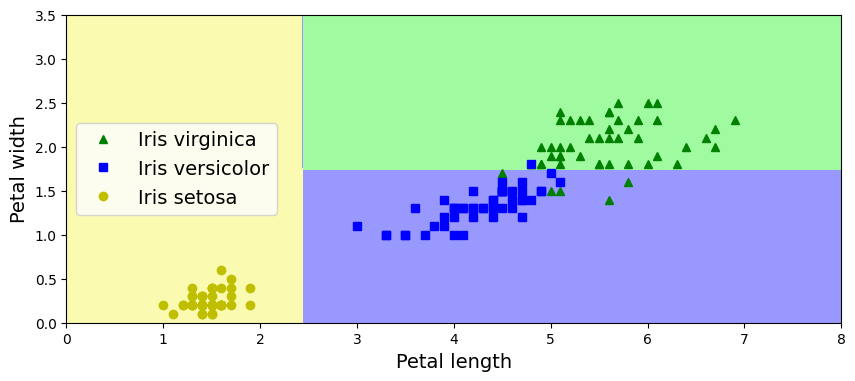

In [77]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(max_depth = 2)
clf_tree.fit(X, y)

print("Score", clf_tree.score(X, y))

generate_iris_plot(clf_tree)

Score 0.98


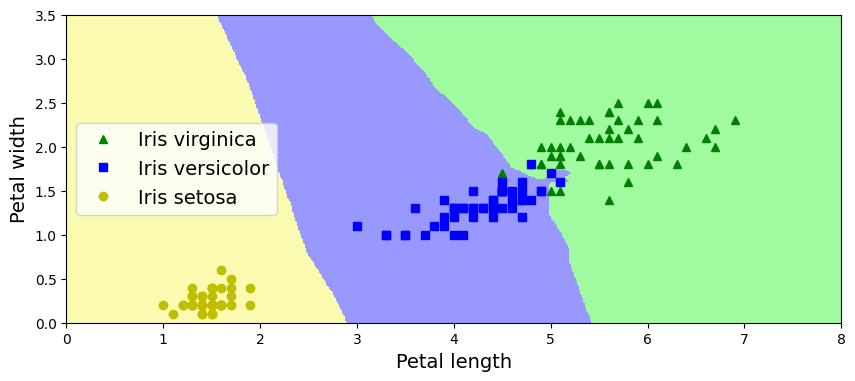

In [78]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X, y)

print("Score", clf_knn.score(X, y))

generate_iris_plot(clf_knn)

3. Construya un modelo de ensamble de votación con los modelos anteriores.


4. Cree una muestra unidimensional con *y* dependiendo cuadraticamente de *x*, entrenar los distintos modelos de regresión que se vieron en clase y comparar las aproximaciones graficandolas. ¿En caso de querer extrapolar, que modelos no parecen ser una buena elección?
Modelos:
  - Regresión Lineal
  - Regresión Polinomica
  - Regresión Lineal Estocástica
  - SVM lineal
  - SVM con kernel
  - Decision Tree
  - KNeighbors
  


5. Al igual que con los clasificadores, contruya un modelo de ensamble de votación, pero esta vez de regresión.

# Preguntas teoricas
### Regresión
1. ¿Qué algoritmo de entrenamiento de Regresión Lineal puedes usar si tienes un conjunto de entrenamiento con millones de características?
2. Supongamos que las características en tu conjunto de entrenamiento tienen escalas muy diferentes. ¿Qué algoritmos podrían sufrir por esto y cómo? ¿Qué puedes hacer al respecto?
3. ¿Puede el Descenso de Gradiente quedar atrapado en un mínimo local al entrenar un modelo de Regresión Logística?
4. ¿Todos los algoritmos de Descenso de Gradiente conducen al mismo modelo, siempre y cuando los dejes correr el tiempo suficiente?
5. Supongamos que usas Descenso de Gradiente por lotes y graficas el error de validación en cada época. Si notas que el error de validación consistentemente aumenta, ¿qué es lo que probablemente está sucediendo? ¿Cómo puedes solucionarlo?
6. ¿Es una buena idea detener inmediatamente el Descenso de Gradiente por mini-lotes cuando el error de validación aumenta?
7. ¿Qué algoritmo de Descenso de Gradiente (entre los que discutimos) llegará más rápido a la cercanía de la solución óptima? ¿Cuál convergerá realmente? ¿Cómo puedes hacer que los demás también converjan?
8. Supongamos que estás utilizando Regresión Polinómica. Graficas las curvas de aprendizaje y notas que hay una gran brecha entre el error de entrenamiento y el error de validación. ¿Qué está sucediendo? ¿Cuáles son tres formas de solucionarlo?
9. Supongamos que estás utilizando Regresión Ridge y notas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Dirías que el modelo sufre de sesgo alto o de varianza alta? ¿Deberías aumentar el hiperparámetro de regularización α o reducirlo?
10. ¿Por qué querrías usar:
  - Regresión Ridge en lugar de Regresión Lineal simple (es decir, sin regularización)?
  - Lasso en lugar de Regresión Ridge?
  - Elastic Net en lugar de Lasso?
11. Supongamos que quieres clasificar imágenes como exteriores/interiores y diurnas/nocturnas. ¿Deberías implementar dos clasificadores de Regresión Logística o uno de Regresión Softmax?
### SVM
1. ¿Cuál es la idea fundamental detrás de las Máquinas de Vectores de Soporte?
2. ¿Qué es un vector de soporte?
3. ¿Por qué es importante escalar las entradas al usar SVM?
4. ¿Puede un clasificador SVM producir un puntaje de confianza al clasificar una instancia? ¿Y una probabilidad?
5. ¿Deberías usar la forma primal o dual del problema SVM para entrenar un modelo en un conjunto de entrenamiento con millones de instancias y cientos de características?
6. Digamos que has entrenado un clasificador SVM con un kernel RBF, pero parece subajustarse al conjunto de entrenamiento. ¿Deberías aumentar o disminuir γ (gamma)? ¿Y C?
### Árboles de decisiones
1. ¿Cuál es la profundidad aproximada de un árbol de decisión entrenado (sin restricciones) en un conjunto de entrenamiento con un millón de instancias?
2. ¿La impureza de Gini de un nodo es generalmente menor o mayor que la de su padre? ¿Es generalmente menor/mayor o siempre menor/mayor?
3. Si un árbol de decisión está sobreajustando el conjunto de entrenamiento, ¿es buena idea intentar disminuir max_depth?
4. Si un árbol de decisión está subajustando el conjunto de entrenamiento, ¿es buena idea intentar escalar las características de entrada?
5. Si tarda una hora en entrenar un árbol de decisión en un conjunto de entrenamiento que contiene 1 millón de instancias, ¿cuánto tiempo aproximado tomará entrenar otro árbol de decisión en un conjunto de entrenamiento que contiene 10 millones de instancias?
6. Si su conjunto de entrenamiento contiene 100,000 instancias, ¿establecer presort=True acelerará el entrenamiento?